In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import string
import json

import spacy
from spacy.tokens import Doc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

import pickle

# from sklearn.model_selection import ValidationCurveDisplay,validation_curve


# spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

In [ ]:
path = ''
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)

In [ ]:
# path = "/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json"

# Read JSON file line by line
data = []
with open(path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
dataframe = pd.DataFrame(data)

# Print the DataFrame
dataframe

In [2]:
# If you are on kaggle, comment this cell
dataframe = pd.read_json("C:/Users/hp/Documents/News_classifications/News_dataset\dataset.json")
dataframe.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# Data Exploration

In [28]:
dataframe.describe()

,date
count,209527
mean,2015-04-30 00:44:14.344308736
min,2012-01-28 00:00:00
25%,2013-08-10 00:00:00
50%,2015-03-16 00:00:00
75%,2016-11-01 00:00:00
max,2022-09-23 00:00:00


## Let's verify if there exist empty line in the dataset

In [30]:
#show the empty lines in the [headline] column
dataframe.loc[dataframe["headline"] == ""]

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [31]:
#show the empty lines in the [short_description] column
dataframe.loc[dataframe["short_description"] == "",]

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [32]:
#Function to remove empty row
def removeEmptyLine(df,col_name):
    df.replace("", pd.NA, inplace = True)
    df.dropna(subset=[col_name], inplace=True)
    return df

In [34]:
dataframe = removeEmptyLine(dataframe,"headline")
dataframe = removeEmptyLine(dataframe,"short_description")

In [35]:
#Verify that empty line was remove successfully
print((dataframe["headline"] == "").sum())
print((dataframe["short_description"] == "").sum())

0

0


## Let's create a graphic to show how many items each category of news have in the data

863


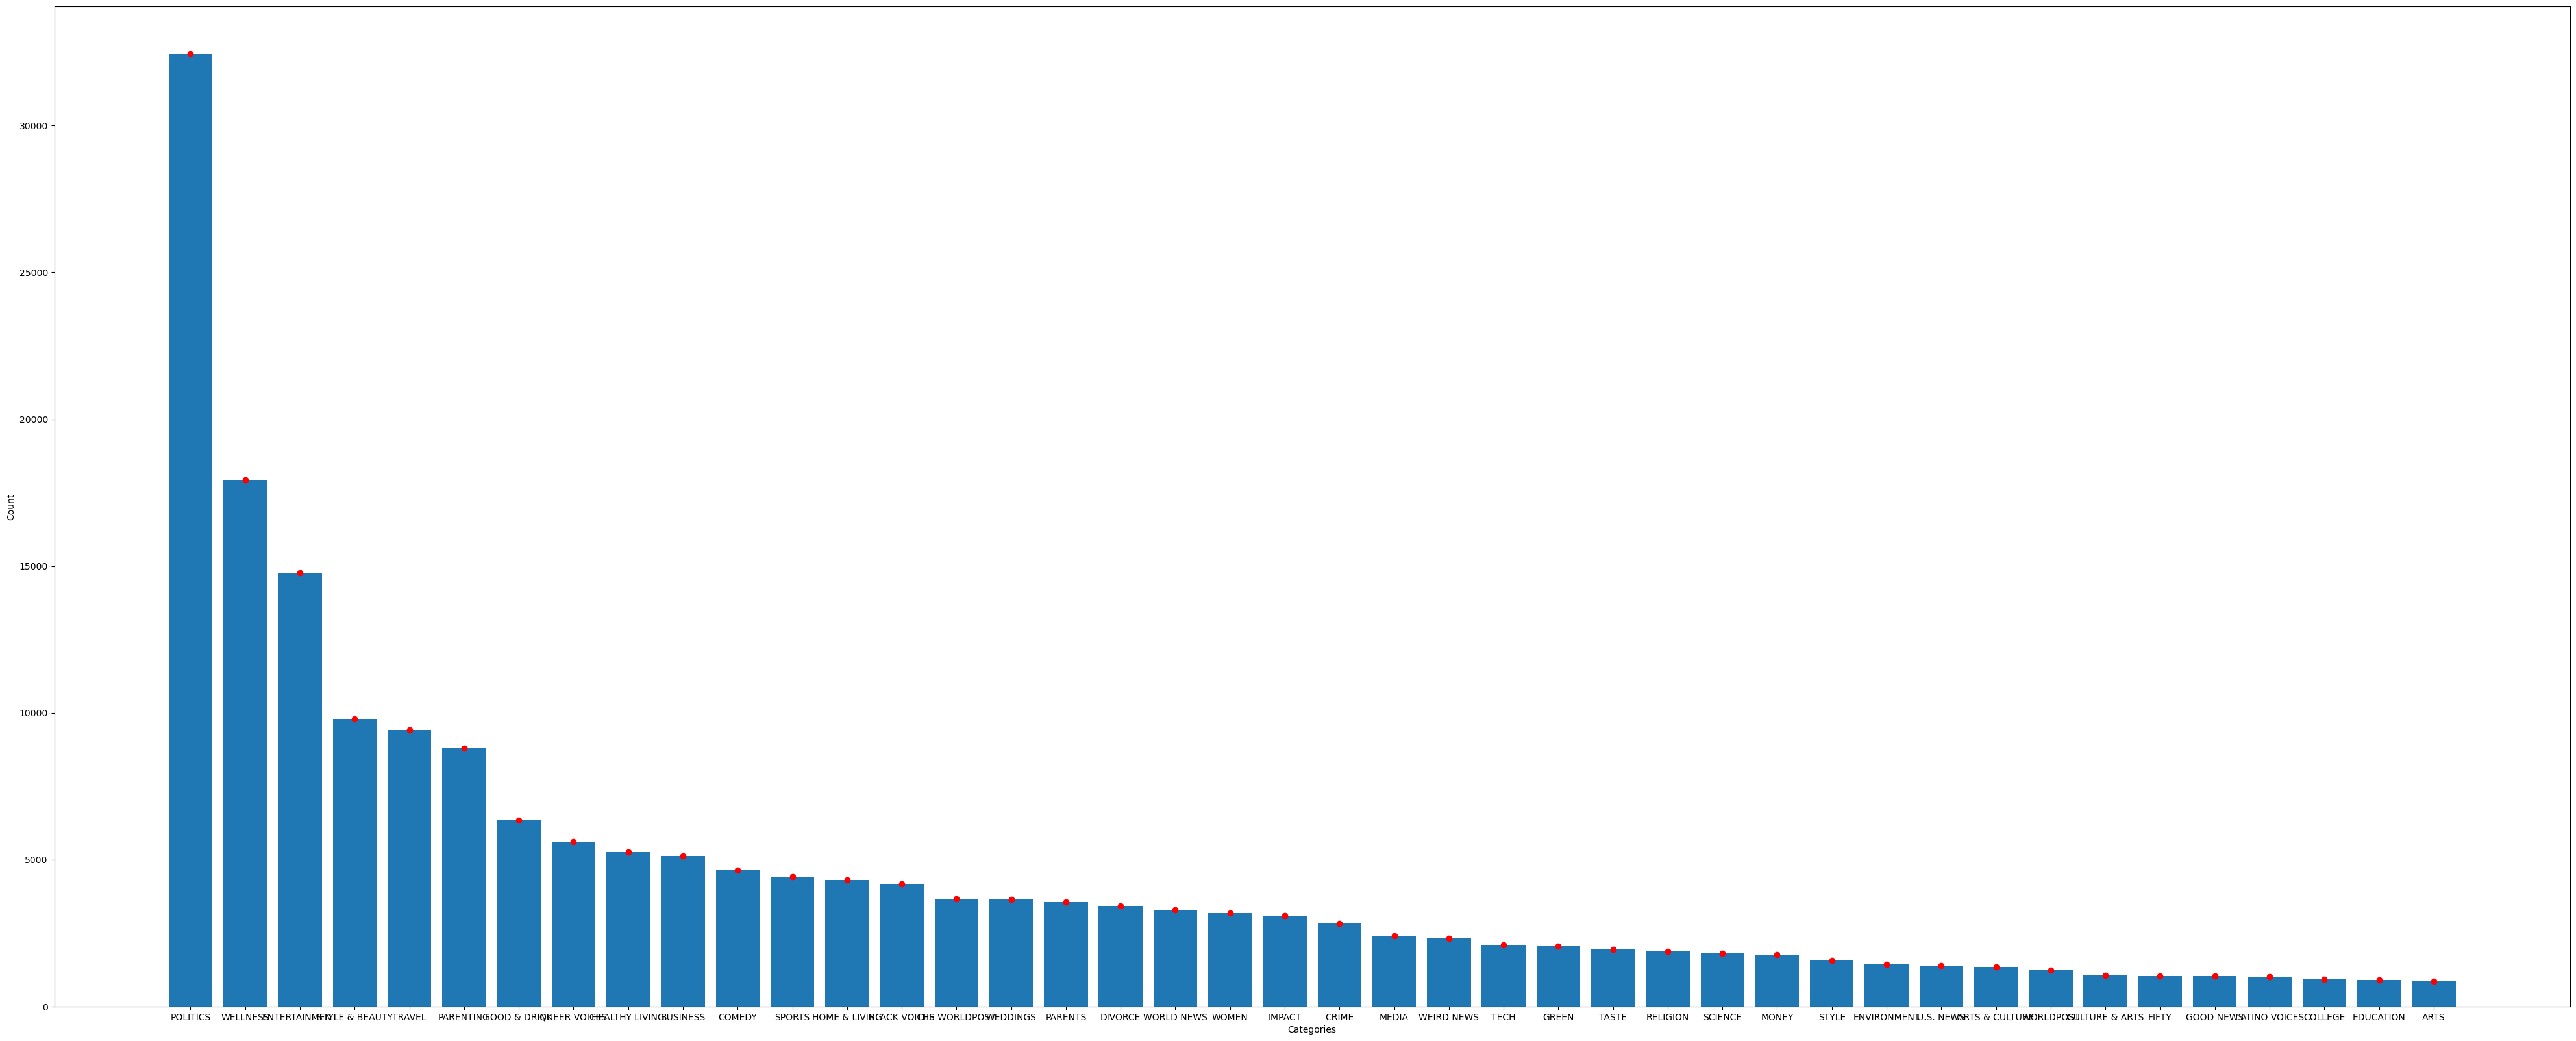

In [36]:
count_df = pd.DataFrame(dataframe.groupby(["category"]).count()["headline"].sort_values(ascending=False),columns=["headline"])
print(dataframe.groupby(["category"]).count()["headline"].min())
plt.figure(figsize=(50,20))
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index,count_df["headline"])
plt.plot(count_df.index,count_df["headline"],'ro')

## Let's get only the categories with more than 4000 news

In [37]:
#get the category with number of news more than 4000
category_list = count_df.loc[count_df["headline"] >= 4000].index.to_list()
category_list

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'STYLE & BEAUTY',
 'TRAVEL',
 'PARENTING',
 'FOOD & DRINK',
 'QUEER VOICES',
 'HEALTHY LIVING',
 'BUSINESS',
 'COMEDY',
 'SPORTS',
 'HOME & LIVING',
 'BLACK VOICES']

In [4]:
# category_list = [
#     'POLITICS',
#     'WELLNESS',
#     'ENTERTAINMENT',
#     'TRAVEL',
#     'STYLE & BEAUTY',
#     'PARENTING',
#     'HEALTHY LIVING',
#     'QUEER VOICES',
#     'FOOD & DRINK',
#     'BUSINESS',
#     'COMEDY',
#     'SPORTS',
#     'HOME & LIVING',
#     'BLACK VOICES'
# ]

my_list = []
for cat in category_list:
    my_list.append(dataframe.loc[dataframe["category"] == cat,['headline','category','short_description']].head(1000))
df = pd.concat(my_list, ignore_index=True)
df["full_new"] = df["headline"] +' '+ df["short_description"]
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...
...,...,...,...,...
11995,Samantha Ponder Is Living Her Dream In Sports,SPORTS,The former athlete stays close to her roots by...,Samantha Ponder Is Living Her Dream In Sports ...
11996,Washington State Bill Would Allow Guns In Spor...,SPORTS,Teams fear safety issues.,Washington State Bill Would Allow Guns In Spor...
11997,"1,000 Russian Athletes Benefited From Doping C...",SPORTS,"“It was a cover-up of an unprecedented scale.""","1,000 Russian Athletes Benefited From Doping C..."
11998,Louisiana Sheriff Uses Joe McKnight Press Conf...,SPORTS,Sheriff Newell Normand was there to announce m...,Louisiana Sheriff Uses Joe McKnight Press Conf...


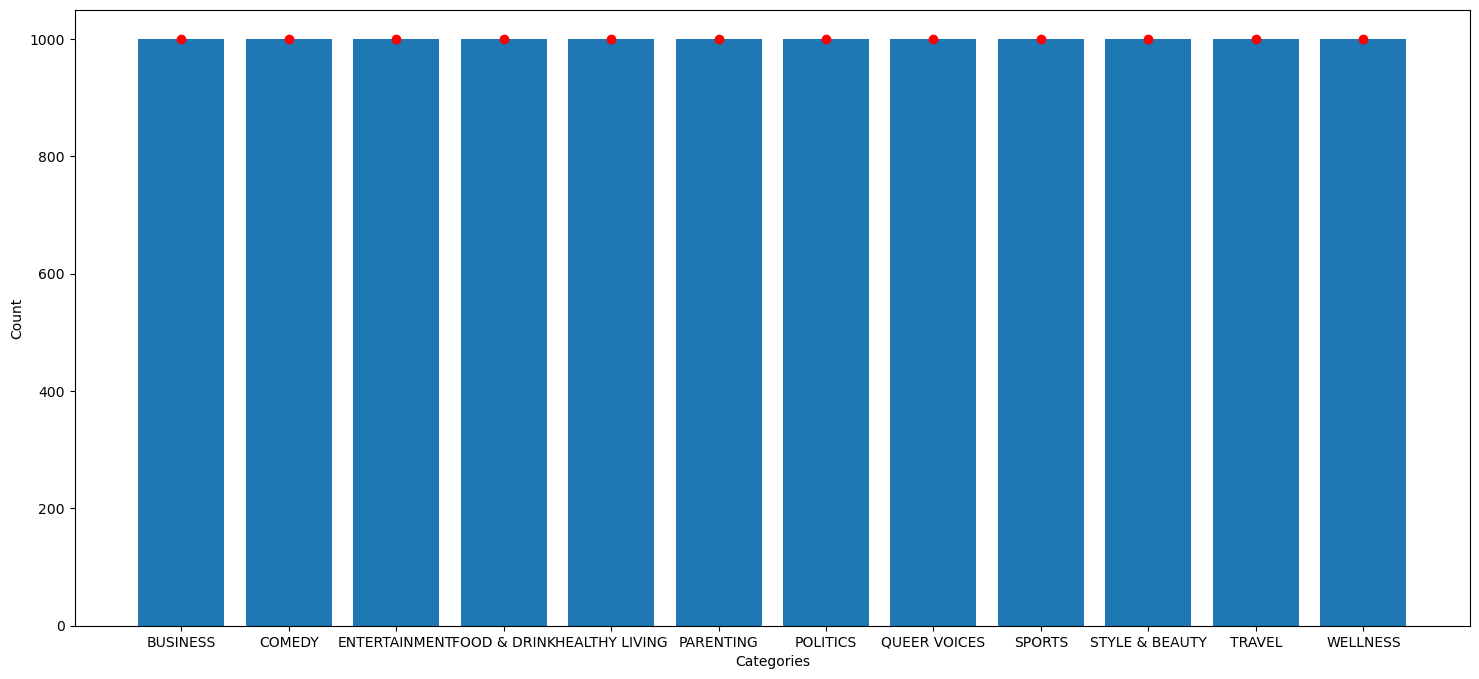

In [5]:
count_df = pd.DataFrame(df.groupby(["category"]).count()["full_new"].sort_values(ascending=False))

plt.figure(figsize=(18,8))
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index,count_df["full_new"])
plt.plot(count_df.index,count_df["full_new"],'ro')

In [6]:
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...
...,...,...,...,...
11995,Samantha Ponder Is Living Her Dream In Sports,SPORTS,The former athlete stays close to her roots by...,Samantha Ponder Is Living Her Dream In Sports ...
11996,Washington State Bill Would Allow Guns In Spor...,SPORTS,Teams fear safety issues.,Washington State Bill Would Allow Guns In Spor...
11997,"1,000 Russian Athletes Benefited From Doping C...",SPORTS,"“It was a cover-up of an unprecedented scale.""","1,000 Russian Athletes Benefited From Doping C..."
11998,Louisiana Sheriff Uses Joe McKnight Press Conf...,SPORTS,Sheriff Newell Normand was there to announce m...,Louisiana Sheriff Uses Joe McKnight Press Conf...


In [7]:
def removeEmptyRow(df,col_name):
    df.replace([" ","","_","__"], pd.NA, inplace = True)
    df.dropna(subset=[col_name], inplace=True)
    return df

In [8]:
df = removeEmptyRow(df,"full_new")
df.head()

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...


# Let's make functions

## Function to do text preprocessing: remove number, remove punctuation, remove stop_words, convert to lower case, and make lemmatization

In [9]:
def text_preprocessing(df,col_name):
    all_doc = []
    for index,row in df.iterrows():
        doc = nlp(row[col_name])
        token_text = []
        for token in doc:
            if not(token.like_num or token.is_punct or token.is_stop):
                token_text.append(str(token.lemma_).lower())
        token_text = " ".join(token_text)
        all_doc.append(token_text)    
    df.loc[:,col_name] = all_doc
    return df

In [10]:
df = text_preprocessing(df,"full_new")
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,biden say u.s. force defend taiwan china invad...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,beautiful sad time ukrainian cultural festival...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",biden say queen death left giant hole royal fa...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,bill help afghans escape taliban face long odd...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,mark meadows complies justice dept subpoena re...
...,...,...,...,...
11995,Samantha Ponder Is Living Her Dream In Sports,SPORTS,The former athlete stays close to her roots by...,samantha ponder live dream sports athlete stay...
11996,Washington State Bill Would Allow Guns In Spor...,SPORTS,Teams fear safety issues.,washington state bill allow guns sports stadiu...
11997,"1,000 Russian Athletes Benefited From Doping C...",SPORTS,"“It was a cover-up of an unprecedented scale.""",russian athletes benefit doping conspiracy rep...
11998,Louisiana Sheriff Uses Joe McKnight Press Conf...,SPORTS,Sheriff Newell Normand was there to announce m...,louisiana sheriff use joe mcknight press confe...


## Function to transform word doc to vector using TF-IDF and split data into train and test

In [11]:
def tfIdf(df,col_name,target_col_name):
    vectorizer = TfidfVectorizer()
    feature = vectorizer.fit_transform(df.loc[:,col_name])
    tdf_df = pd.DataFrame(feature.toarray(),columns=vectorizer.get_feature_names_out())
    X_train, X_test , y_train, y_test = train_test_split(feature.toarray(),df.loc[:,target_col_name],random_state = 42)
    return X_train, X_test,y_train,y_test

## Function to show confusion matrix

In [12]:
def confused_matrix(y_test, y_pred,labels):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred,labels = labels)

    # Display the confusion matrix
    plt.figure(figsize=(10, 10))  # Sets the figure size
    sns.heatmap(cm, annot=True, fmt="d",xticklabels = labels,yticklabels = labels,)  # Plots the confusion matrix as a heatmap
    plt.title('Confusion matrix')  # Sets the title of the plot
    plt.ylabel('Actual label')  # Sets the label of the y-axis
    plt.xlabel('Predicted label')  # Sets the label of the x-axis
    plt.show()  # Displays the plot

In [13]:
X_train, X_test,y_train,y_test = tfIdf(df,'full_new','category')

# Now, let's create some function to perform algortihm on data

## function nearestCentroidAlgo

In [14]:
from sklearn.neighbors import NearestCentroid

def nearestCentroidAlgo(X_train, X_test,y_train,y_test):
    knn = NearestCentroid()
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score for NearestCentroid = {accuracy}")
    confused_matrix(y_test, y_pred,knn.classes_)

Accuracy score for NearestCentroid = 0.6806666666666666


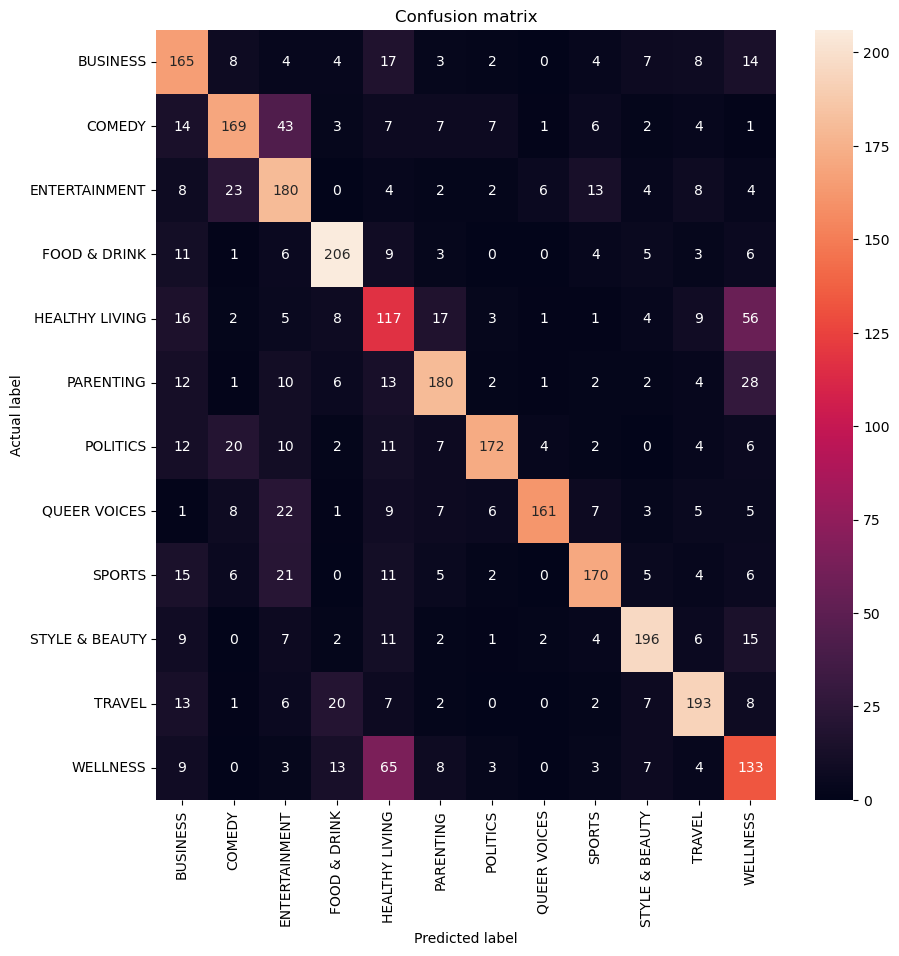

In [15]:
nearestCentroidAlgo(X_train, X_test,y_train,y_test)

## KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

def knnAlogo(X_train, X_test,y_train,y_test):
    neigh = KNeighborsClassifier(algorithm='kd_tree', leaf_size=200, n_neighbors=25,weights='distance')
    neigh = neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy score for K Nearest Neighbor = {accuracy}")
    confused_matrix(y_test, y_pred,neigh.classes_)

accuracy score for K Nearest Neighbor = 0.669


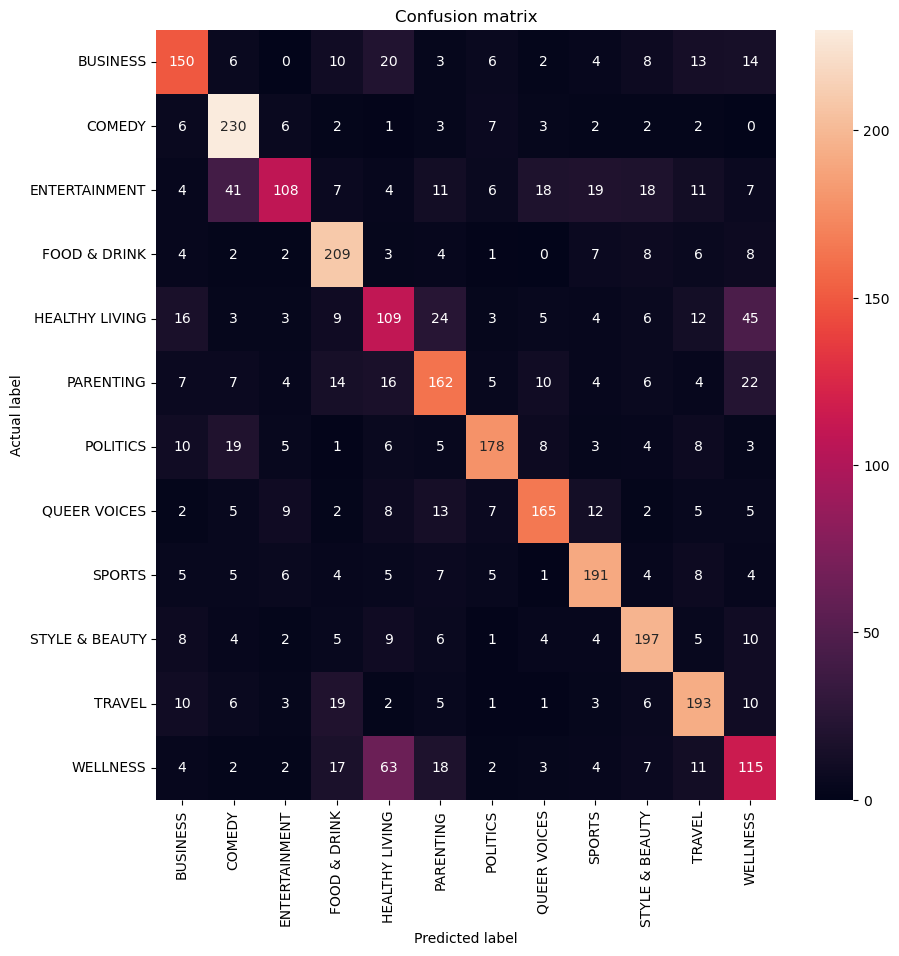

In [18]:
knnAlogo(X_train, X_test,y_train,y_test)

## Function to save model

In [20]:
model_path = "C:/Users/hp/Documents/News_classifications/Models/"
def saveModel(model,path,filename):
    filename = path + filename
    # save the model to disk
    pickle.dump(model, open(filename, 'wb'))
    return filename

## Function for SVM 

In [21]:
def svmAlgo(X_train, X_test,y_train,y_test):
    # Define the SVM classifier
    svm_classifier = svm.SVC(C = 5,kernel = 'rbf',gamma='scale',probability=True)
    svm_cv = svm_classifier
    svm_cv = svm_cv.fit(X_train, y_train)
    # Evaluate the best model on the test set
    y_pred = svm_cv.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy score for SVM = {accuracy}")
    confused_matrix(y_test, y_pred,svm_cv.classes_) 
    saveModel(svm_cv,model_path,"svm_model.pkl") #comment this line if you are on kaggle

accuracy score for SVM = 0.734


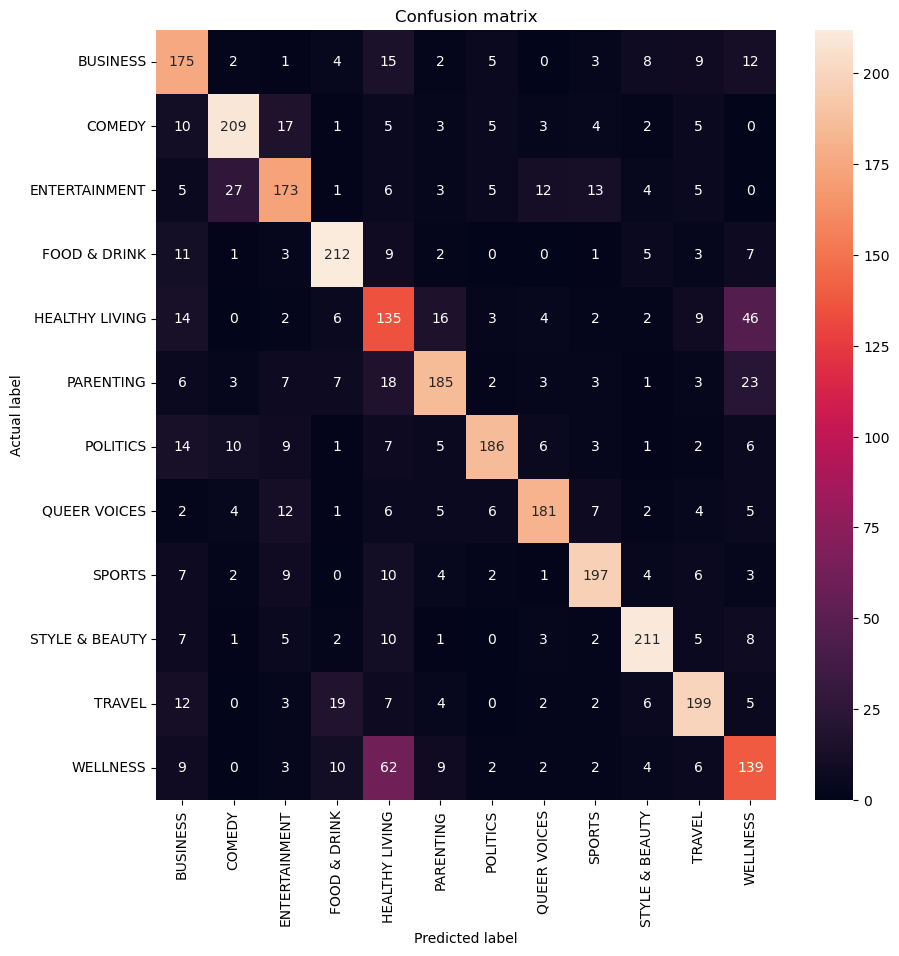

In [22]:
svmAlgo(X_train, X_test,y_train,y_test)

The accuracy score for SVM is the greater with 73,4%.
During test, i noticed that more there exist line, more the accuracy score grow.
Using 1000 news for each 12 top categories equal to 12 000 news.
To train SVM only, That take all the night (7.PM to 6.AM in the new day)

I use HP pavillon Core i7 with 32 G for RAM, processor up to 4 GHZ. It's impossible fo to run the code on kaggle